    Columns
    Gender: Пол пассажиров (женщина - 0, мужчина - 1)
    Customer Type: тип клиента
    Age: Фактический возраст пассажиров
    Type of Travel: Цель полета пассажиров
    Class: Туристический класс в самолете пассажиров (Бизнес, Эко, Эко Плюс)
    Flight Distance: Расстояние полета
    Inflight wifi service: уровень удовлетворенности услугой Wi-Fi на борту (0: не применимо; 1–5)
    Departure/Arrival time convenient: Уровень удовлетворенности удобным временем отправления/прибытия
    Ease of Online booking: уровень удовлетворенности онлайн-бронированием
    Gate location: уровень удовлетворенности расположением ворот
    Food and drink: уровень удовлетворенности едой и напитками
    Online boarding: уровень удовлетворенности онлайн-регистрацией на посадку
    Seat comfort: Удовлетворительный уровень комфорта сиденья
    Inflight entertainment: уровень удовлетворенности развлечениями на борту
    On-board service: Уровень удовлетворенности обслуживанием на борту
    Leg room service: Уровень удовлетворенности пространством между сиденьями
    Baggage handling: Уровень удовлетворенности обработкой багажа
    Checkin service: уровень удовлетворенности услугой регистрации
    Inflight service: уровень удовлетворенности обслуживанием на борту
    Cleanliness: Удовлетворительный уровень чистоты
    Departure Delay in Minutes: Минуты задержки при отправлении
    Arrival Delay in Minutes: Минуты задержки при прибытии
    satisfaction: Уровень удовлетворенности авиакомпании (удовлетворенность, нейтральность или неудовлетворенность)

### Начало работы

In [191]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, ADASYN

df = pd.read_csv('train.csv',encoding='ISO-8859-1')
test_data = pd.read_csv('test.csv',encoding='ISO-8859-1')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,Male,49,First-time,Business,Business,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,82113,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,54411,Female,19,Returning,Personal,Economy,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,15247,Male,58,Returning,Business,Business,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [192]:
# df.info()

In [193]:
df_nan = df.loc[:, df.isnull().any()]
df_nan.isnull().sum() / len(df_nan) * 100

Arrival Delay    0.308355
dtype: float64

In [194]:
# for col in df.columns:    
#     print(col)
#     print(df[col].unique())

In [195]:
for col in df.columns:    
    print(df[col].value_counts())

ID
37576    1
84602    1
28268    1
65457    1
57200    1
        ..
16305    1
23900    1
15492    1
15201    1
21254    1
Name: count, Length: 84967, dtype: int64
Gender
Female    42927
Male      42040
Name: count, dtype: int64
Age
39    2566
40    2285
44    2258
41    2252
42    2159
      ... 
73      39
76      39
78      25
79      24
85      14
Name: count, Length: 75, dtype: int64
Customer Type
Returning     71524
First-time    13443
Name: count, dtype: int64
Type of Travel
Business    64961
Personal    20006
Name: count, dtype: int64
Class
Business        48243
Economy         31423
Economy Plus     5301
Name: count, dtype: int64
Flight Distance
337     499
594     295
447     292
2475    287
862     281
       ... 
884       1
887       1
1019      1
1332      1
1161      1
Name: count, Length: 3746, dtype: int64
Departure Delay
0      48825
1       2396
2       1915
3       1651
4       1520
       ...  
447        1
263        1
853        1
491        1
390        1
Name:

In [196]:
# df.groupby('Departure Delay')['Arrival Delay'].apply(lambda x: x.isnull().sum())

### Предобработка данных

In [197]:
def preprocessing(df):

    df['Gender'] = df['Gender'].apply(lambda x:1 if 'Male' in x else 0)
    df['Customer Type'] = df['Customer Type'].apply(lambda x:1 if 'Returning' in x else 0)
    df['Type of Travel'] = df['Type of Travel'].apply(lambda x:1 if 'Business' in x else 0)

    class_ranking = {
    'Business': 2,
    'Economy Plus': 1,
    'Economy': 0,
    }

    df['Class'] = df['Class'].map(class_ranking)

    df = df.drop(['Arrival Delay'], axis=1)

    return df

In [198]:
df['Satisfaction'] = df['Satisfaction'].apply(lambda x:1 if 'Satisfied' in x else 0)
df = df.drop(['ID'], axis=1)

In [199]:
df = preprocessing(df)
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,46,1,1,10,1608,0,1,1,5,...,5,5,5,3,2,5,1,5,5,1
1,1,30,1,1,10,1379,30,5,5,1,...,3,1,5,1,1,3,1,1,3,0
2,0,50,1,1,10,414,0,5,4,4,...,4,5,4,5,3,4,5,4,4,1
3,0,48,1,1,0,95,0,3,3,1,...,5,1,5,2,1,5,5,5,5,1
4,0,24,1,1,3,143,0,5,0,4,...,5,1,2,1,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,1,49,0,1,10,1310,0,3,3,3,...,4,3,2,3,3,4,4,3,4,0
84963,1,7,1,0,3,650,0,3,2,2,...,2,1,4,1,1,4,2,1,3,0
84964,0,19,1,0,0,363,0,5,3,5,...,5,5,3,5,5,5,3,5,5,0
84965,1,58,1,1,10,3445,9,1,1,3,...,5,5,5,3,5,5,1,5,5,1


In [200]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [201]:
num_cols = ['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [202]:
processor = ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), num_cols)
    ])

In [203]:
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

### Балансировка признаков

In [204]:
# smote = SMOTE(random_state=42)

# X, y = smote.fit_resample(X, y)

# # for col in X.columns:    
# #     print(X[col].value_counts())

In [205]:
adasyn = ADASYN()

X, y = adasyn.fit_resample(X, y)

In [206]:
processor.fit_transform(X)

array([[1.        , 0.5       , 1.        , ..., 0.2       , 1.        ,
        1.        ],
       [1.        , 0.29487179, 1.        , ..., 0.2       , 0.2       ,
        0.5       ],
       [0.        , 0.55128205, 1.        , ..., 1.        , 0.8       ,
        0.75      ],
       ...,
       [0.        , 0.73076923, 1.        , ..., 0.2       , 1.        ,
        0.75      ],
       [1.        , 0.48717949, 0.        , ..., 0.8       , 0.6       ,
        0.75      ],
       [1.        , 0.5       , 0.        , ..., 0.6       , 0.6       ,
        0.75      ]])

In [207]:
X_prep = processor.transform(X)

### Обучение модели

In [208]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier

# X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.3, random_state=47)

# tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [i for i in range(1, 5)],
#               'min_samples_leaf': [i for i in range(1, 5)], 
#                'max_leaf_nodes': [i for i in range(1, 5)]}]


# dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)
# dtc_model.fit(X = X_train,
#           y = y_train)

# prediction_clf = dtc_model.best_estimator_.predict(X_test)
# score = accuracy_score(y_test, prediction_clf)

# print(f'Лучшие найденные параметры: {dtc_model.best_estimator_}')
# print(f'Точность на тренировочных данных: {round(dtc_model.best_score_*100, 2)}')
# print(f'Точность на тестовых данных: {round(score*100, 2)}')

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

# model = LogisticRegression()

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
model = RandomForestClassifier(n_estimators=200, random_state= 42, class_weight=dict(enumerate(class_weights)))
# model = RandomForestClassifier(n_estimators=100, random_state= 42)

feature_names = processor.get_feature_names_out(input_features=X.columns)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1-score", metrics.f1_score(y_test, y_pred, average = 'micro'))

Train dataset size: (72171, 21), (72171,)
Test dataset size: (30931, 21), (30931,)
Accuracy 0.9640813423426337
Precision 0.9677627337201805
Recall 0.960885986812624
F1-score 0.9640813423426337


Train dataset size: (72679, 21), (72679,)
Test dataset size: (31149, 21), (31149,)
Accuracy 0.9619891489293396
Precision 0.9680484154356739
Recall 0.9554884706789132
F1-score 0.9619891489293396 

### Анализ результата

In [210]:
confusion_matrix(y_test, y_pred)

array([[14810,   500],
       [  611, 15010]], dtype=int64)

In [211]:
# from sklearn.model_selection import KFold, cross_val_score

# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
# rfl = RandomForestClassifier(random_state= 42, class_weight=dict(enumerate(class_weights)))

# scores = cross_val_score(rfl, X_prep, y, cv=kf, scoring='r2')
# scores

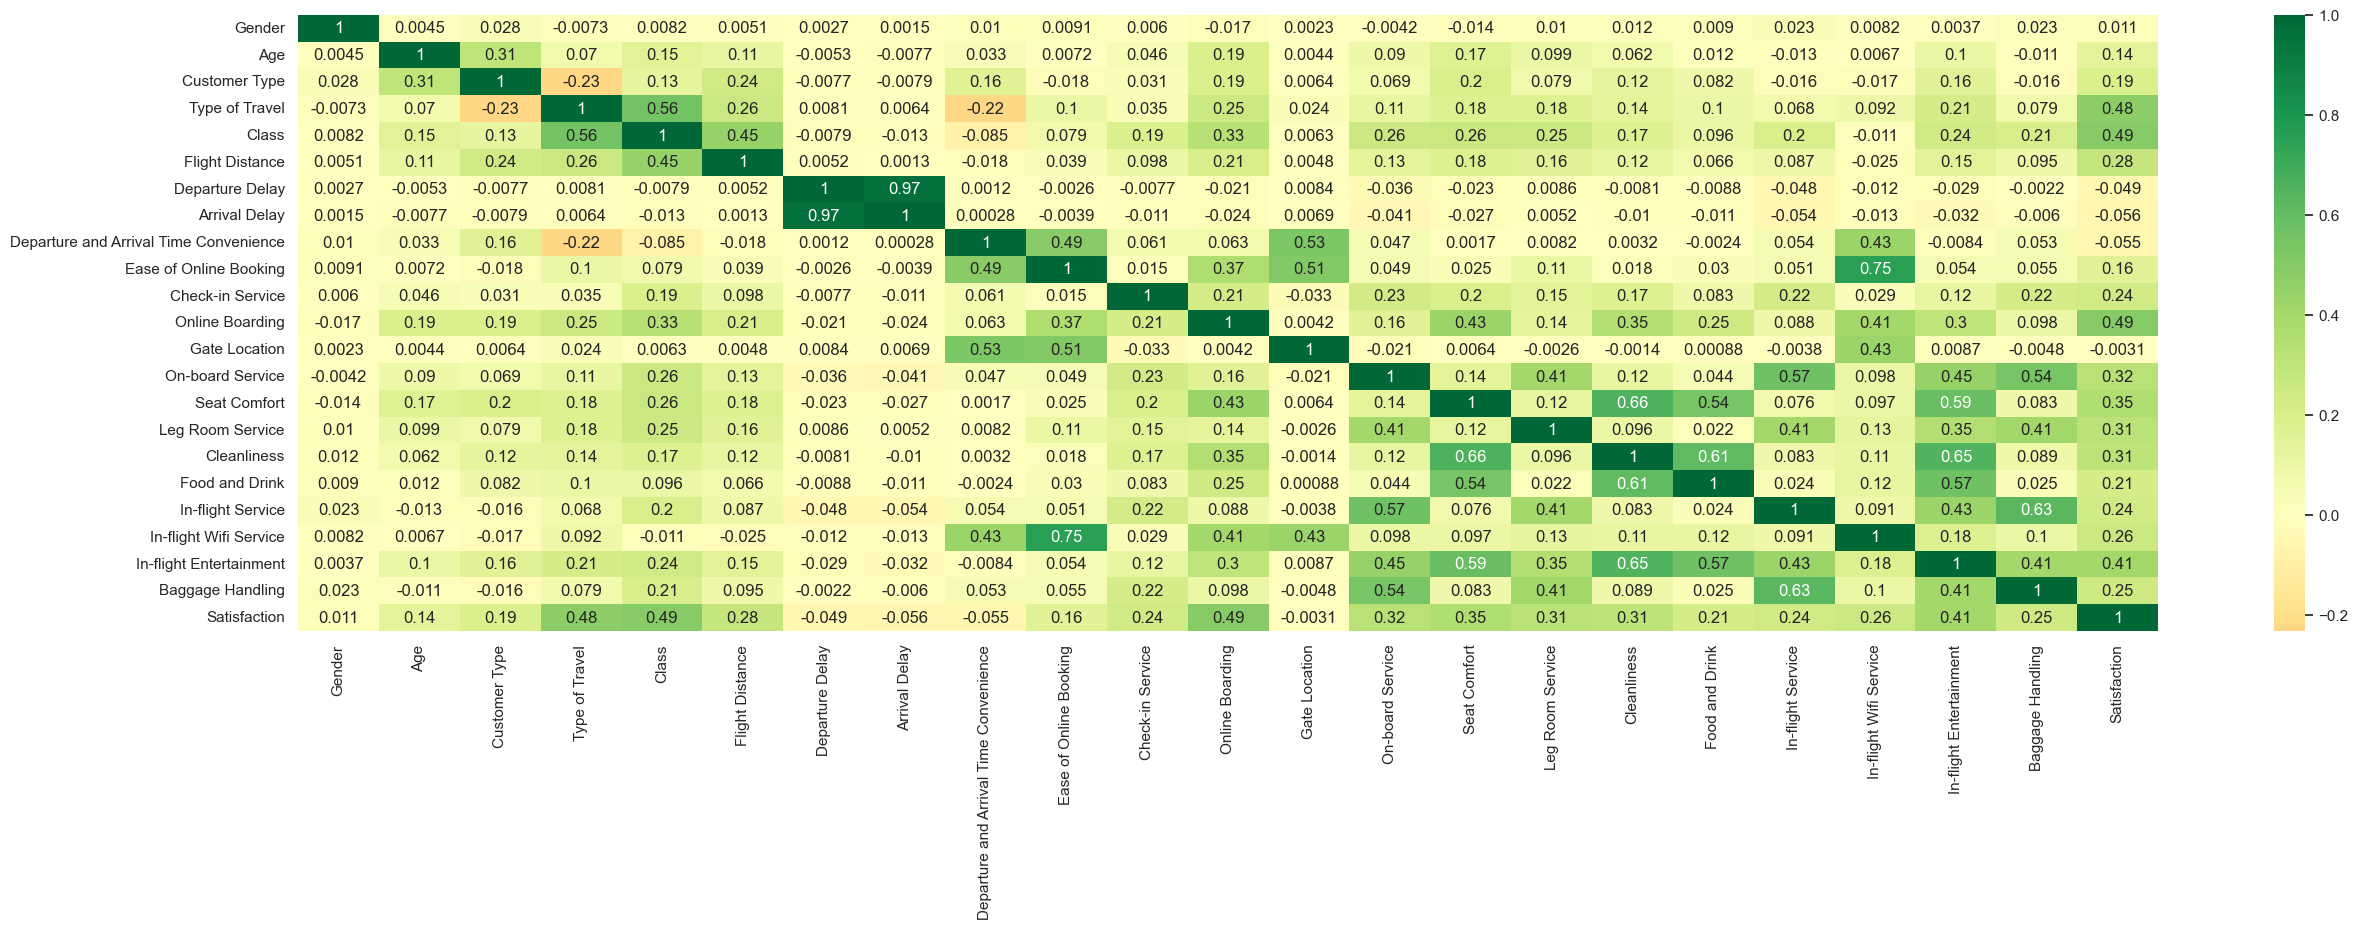

<Axes: >

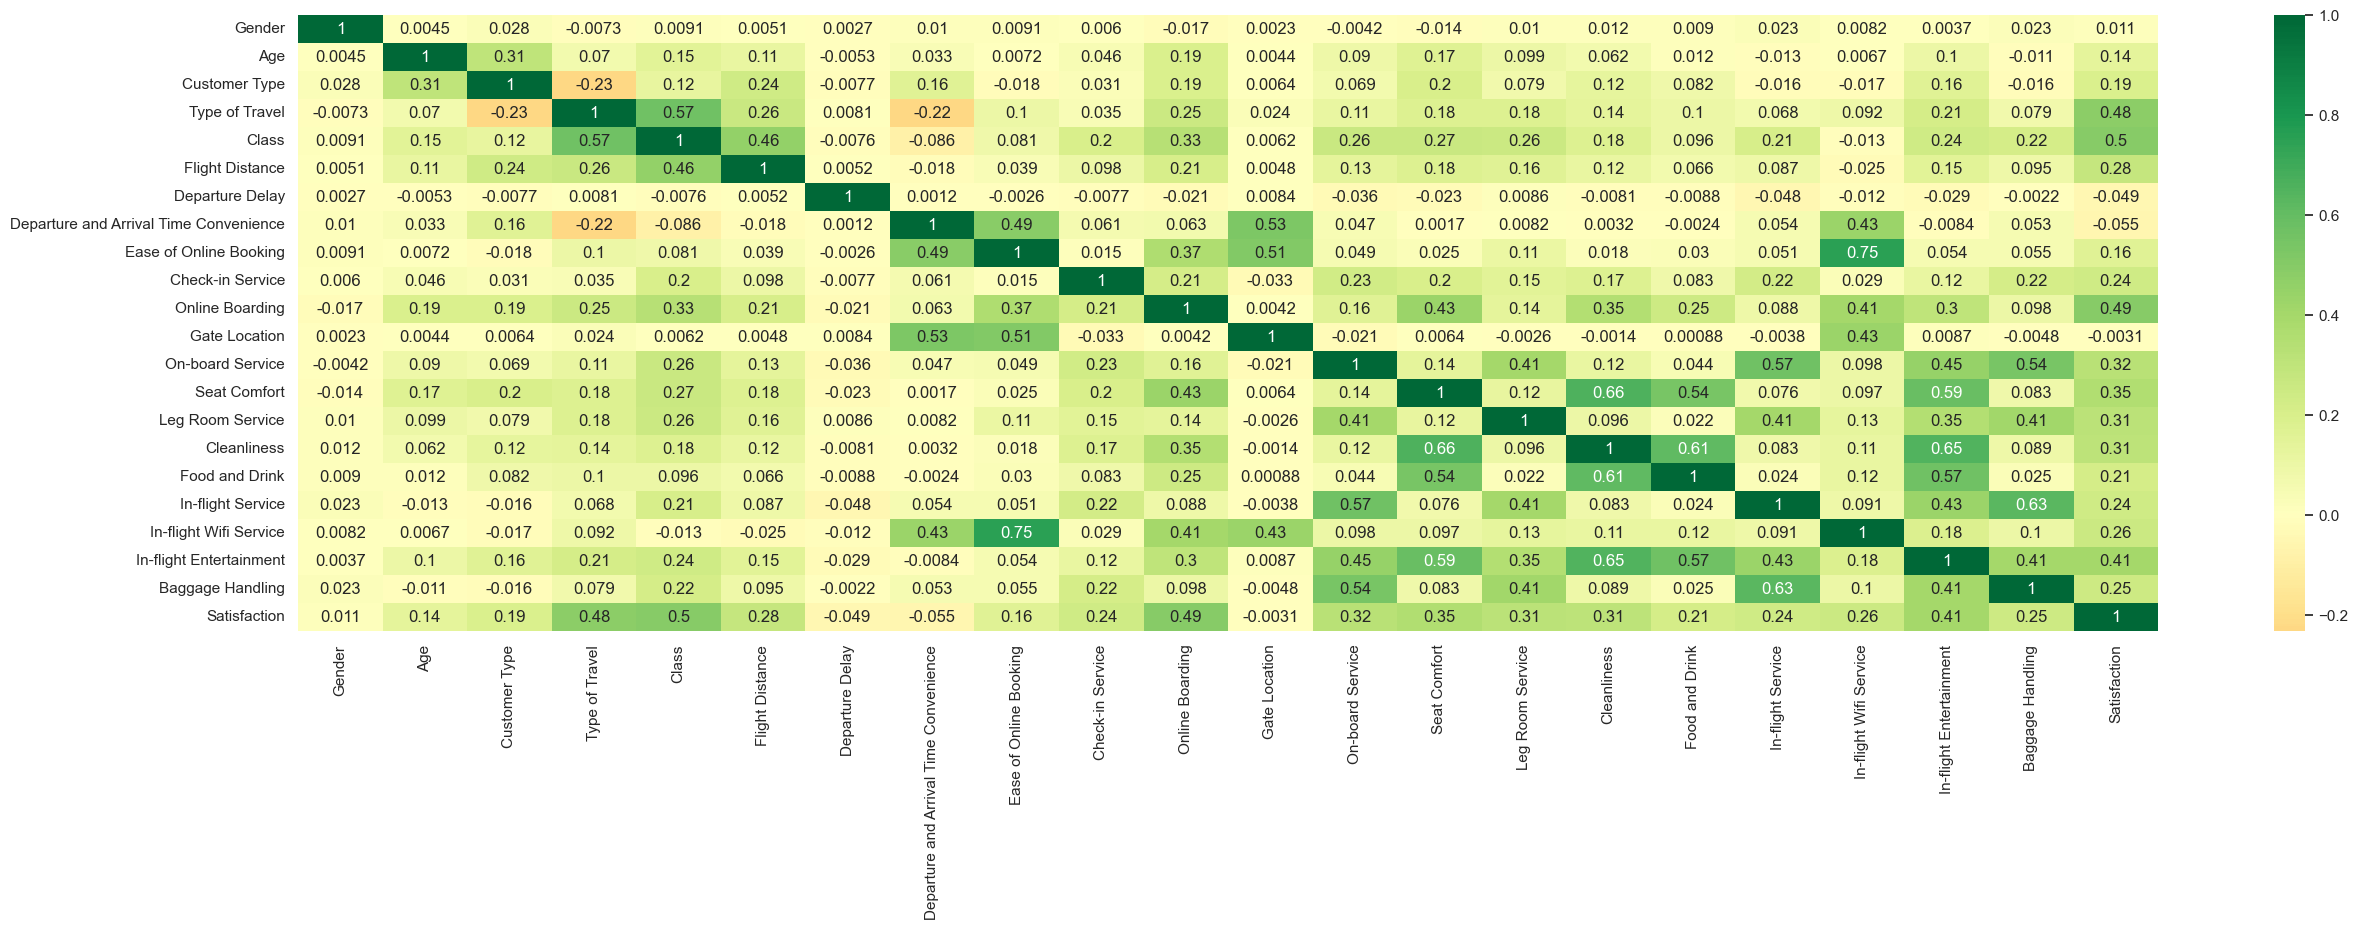

In [212]:
sns.set(rc={"figure.figsize": (30, 8)})
sns.heatmap(df.corr(numeric_only=True), cmap='RdYlGn', center=0, annot=True)

In [213]:
# weights = model.coef_
# # print(feature_names)
# pd.DataFrame({'Feature': feature_names, 'Weight': weights})

In [214]:
# total = test_data.copy()
# total = preprocessing(total)

### Предсказание данных

In [215]:
test1 = test_data.copy()
test1 = preprocessing(test1)
test1

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,0,46,0,1,0,978,0,3,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,0,21,0,1,0,1005,0,1,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,0,39,1,0,0,954,18,5,1,...,2,4,5,3,3,3,5,1,3,5
3,92408,1,22,1,0,10,765,0,5,2,...,3,5,2,2,2,2,5,2,2,5
4,117611,1,48,1,1,10,2123,9,4,4,...,4,2,4,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,117154,1,64,1,1,10,1947,27,5,5,...,5,1,3,1,2,1,1,1,1,1
44909,101603,0,23,0,1,0,1180,0,4,4,...,1,3,1,5,2,2,4,4,2,4
44910,105970,1,50,1,1,0,451,0,2,2,...,2,2,1,5,1,1,1,1,1,1
44911,89524,0,49,0,1,10,227,4,2,2,...,3,1,5,5,3,3,3,2,3,4


In [216]:
test1 = processor.transform(test1)

pred = model.predict(test1)
submission = pd.DataFrame({'ID': test_data.ID, 'Satisfaction': pred})
submission.to_csv('submission.csv', index=False)